# CAR PRICE PREDICTION

1. pip install ydata-profiling
2. pip install pandas-profiling
3. pip install visions

- Data Set: audi.csv
- Dependent variable: price 

# Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings('ignore')

In [2]:
print (os.getcwd())

C:\Users\parmo\Internship\Project\Project 1


In [3]:
os.chdir ('C:\\Users\\parmo\\Internship\\Project\\Project 1\\')
print (os.getcwd())


C:\Users\parmo\Internship\Project\Project 1


### Read Data, Display records 

In [4]:
df=pd.read_csv("audi.csv")
display(df)

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 columns]

# Automated Exploratory Data Analysis (EDA) 

### Pandas Profiling Report 

In [5]:
import ydata_profiling as pf
display(pf.ProfileReport(df))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Manual EDA
#### Number of records

In [6]:
print (len(df))

10668


In [7]:
display (df.shape)  ## Number of records- Shape

(10668, 9)

In [8]:
display (df.dtypes ) #Checking the data types

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [9]:
display (df.isna().sum() ) #Checking null values

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [10]:
print (df.info()) # Data set details – Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


In [11]:
display (df.describe()) # Data set details – Describe 

year          price        mileage           tax           mpg  \
count  10668.000000   10668.000000   10668.000000  10668.000000  10668.000000   
mean    2017.100675   22896.685039   24827.244001    126.011436     50.770022   
std        2.167494   11714.841888   23505.257205     67.170294     12.949782   
min     1997.000000    1490.000000       1.000000      0.000000     18.900000   
25%     2016.000000   15130.750000    5968.750000    125.000000     40.900000   
50%     2017.000000   20200.000000   19000.000000    145.000000     49.600000   
75%     2019.000000   27990.000000   36464.500000    145.000000     58.900000   
max     2020.000000  145000.000000  323000.000000    580.000000    188.300000   

         engineSize  
count  10668.000000  
mean       1.930709  
std        0.602957  
min        0.000000  
25%        1.500000  
50%        2.000000  
75%        2.000000  
max        6.300000

In [12]:
X = df.iloc[:,[0,1,3,4,5,6,7,8]].values  #Create X 
display (X.shape)
display (X)

(10668, 8)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [13]:
Y = df.iloc[:,[2]].values   #Create Y
display (Y.shape)
display (Y)

(10668, 1)

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

### Display Top 5 - X variable 

In [14]:
display(pd.DataFrame(X).head(5))  

0     1          2      3       4    5     6    7
0   A1  2017     Manual  15735  Petrol  150  55.4  1.4
1   A6  2016  Automatic  36203  Diesel   20  64.2  2.0
2   A1  2016     Manual  29946  Petrol   30  55.4  1.4
3   A4  2017  Automatic  25952  Diesel  145  67.3  2.0
4   A3  2019     Manual   1998  Petrol  145  49.6  1.0

#### Label Encoding Column – Model and Fuel Type

In [15]:
from sklearn.preprocessing import LabelEncoder  
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,-4] = le2.fit_transform(X[:,-4])
display (X)

array([[0, 2017, 'Manual', ..., 150, 55.4, 1.4],
       [5, 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [0, 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [2, 2020, 'Manual', ..., 150, 49.6, 1.0],
       [9, 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [9, 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

### One hot Encoding to column – transmission

In [16]:
from sklearn.preprocessing import OneHotEncoder  
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)
display (X.shape)
display (pd.DataFrame(X))
display (pd.DataFrame(X))  #Display – X 

(10668, 10)

0    1    2  3     4      5  6    7     8    9
0      0.0  1.0  0.0  0  2017  15735  2  150  55.4  1.4
1      1.0  0.0  0.0  5  2016  36203  0   20  64.2  2.0
2      0.0  1.0  0.0  0  2016  29946  2   30  55.4  1.4
3      1.0  0.0  0.0  3  2017  25952  0  145  67.3  2.0
4      0.0  1.0  0.0  2  2019   1998  2  145  49.6  1.0
...    ...  ...  ... ..   ...    ... ..  ...   ...  ...
10663  0.0  1.0  0.0  2  2020   4018  2  145  49.6  1.0
10664  0.0  1.0  0.0  2  2020   1978  2  150  49.6  1.0
10665  0.0  1.0  0.0  2  2020    609  2  150  49.6  1.0
10666  1.0  0.0  0.0  9  2017   8646  2  150  47.9  1.4
10667  0.0  1.0  0.0  9  2016  11855  2  150  47.9  1.4

[10668 rows x 10 columns]

0    1    2  3     4      5  6    7     8    9
0      0.0  1.0  0.0  0  2017  15735  2  150  55.4  1.4
1      1.0  0.0  0.0  5  2016  36203  0   20  64.2  2.0
2      0.0  1.0  0.0  0  2016  29946  2   30  55.4  1.4
3      1.0  0.0  0.0  3  2017  25952  0  145  67.3  2.0
4      0.0  1.0  0.0  2  2019   1998  2  145  49.6  1.0
...    ...  ...  ... ..   ...    ... ..  ...   ...  ...
10663  0.0  1.0  0.0  2  2020   4018  2  145  49.6  1.0
10664  0.0  1.0  0.0  2  2020   1978  2  150  49.6  1.0
10665  0.0  1.0  0.0  2  2020    609  2  150  49.6  1.0
10666  1.0  0.0  0.0  9  2017   8646  2  150  47.9  1.4
10667  0.0  1.0  0.0  9  2016  11855  2  150  47.9  1.4

[10668 rows x 10 columns]

#### Features Scaling – Standardization 

In [17]:
from sklearn.preprocessing import StandardScaler   
sc = StandardScaler()
X = sc.fit_transform(X)
display (pd.DataFrame(X))

0         1         2         3         4         5         6  \
0     -0.583268  1.200728 -0.712333 -1.123544 -0.046450 -0.386836  1.050783   
1      1.714479 -0.832828 -0.712333 -0.160831 -0.507834  0.483989 -0.954181   
2     -0.583268  1.200728 -0.712333 -1.123544 -0.507834  0.217781  1.050783   
3      1.714479 -0.832828 -0.712333 -0.545916 -0.046450  0.047853 -0.954181   
4     -0.583268  1.200728 -0.712333 -0.738459  0.876318 -0.971285  1.050783   
...         ...       ...       ...       ...       ...       ...       ...   
10663 -0.583268  1.200728 -0.712333 -0.738459  1.337702 -0.885343  1.050783   
10664 -0.583268  1.200728 -0.712333 -0.738459  1.337702 -0.972136  1.050783   
10665 -0.583268  1.200728 -0.712333 -0.738459  1.337702 -1.030381  1.050783   
10666  1.714479 -0.832828 -0.712333  0.609339 -0.046450 -0.688442  1.050783   
10667 -0.583268  1.200728 -0.712333  0.609339 -0.507834 -0.551913  1.050783   

              7         8         9  
0      0.357147  0.357550 -0.880218  
1     -1.578323  1.037130  0.114925  
2     -1.429440  0.357550 -0.880218  
3      0.282706  1.276528  0.114925  
4      0.282706 -0.090355 -1.543647  
...         ...       ...       ...  
10663  0.282706 -0.090355 -1.543647  
10664  0.357147 -0.090355 -1.543647  
10665  0.357147 -0.090355 -1.543647  
10666  0.357147 -0.221637 -0.880218  
10667  0.357147 -0.221637 -0.880218  

[10668 rows x 10 columns]

In [17]:
from sklearn.model_selection import train_test_split   #Train Test Split 
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(10668, 10) (10668, 1)
(8534, 10) (8534, 1)
(2134, 10) (2134, 1)


In [18]:
from sklearn.ensemble import RandomForestRegressor   #Create Random Forest Regressor 
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train,Y_train)
display (regression)

RandomForestRegressor(random_state=0)

In [19]:
y_pred = regression.predict(X_test)  #Prediction with Test Data 
display (y_pred)

array([14337.15, 23450.35, 27330.07, ..., 46275.18, 31359.  ,  9929.62])

In [20]:
print (pd.concat ([pd.DataFrame(Y_test.reshape(len(Y_test),1),columns =['Car Price']),    #Display actual and Predicted Values 
                   pd.DataFrame(y_pred.reshape(len(y_pred),1),columns =['Price Prediction'])],axis =1))

      Car Price  Price Prediction
0         14998          14337.15
1         21950          23450.35
2         28990          27330.07
3         25489          27200.98
4         30950          32250.05
...         ...               ...
2129      23700          39147.77
2130      18000          16679.95
2131      45995          46275.18
2132      30500          31359.00
2133       8400           9929.62

[2134 rows x 2 columns]


In [22]:
# Let's see all column names
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [23]:
# Let's create a new variable 'Current_Year'
df['Current_Year'] = 2020

# To Calculate how old the car is, I created new feature "No_of_Years"
df['No_of_Years'] = df['Current_Year'] - df['year']

df.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4   
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0   
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4   
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0   
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0   

   Current_Year  No_of_Years  
0          2020            3  
1          2020            4  
2          2020            4  
3          2020            3  
4          2020            1

In [24]:
final_df = df.copy()            # Creating copy of created dataframe
final_df.drop(labels= ['model','year', 'Current_Year'], axis= 1, inplace= True)          #droping unnecessary features

final_df.head()

price transmission  mileage fuelType  tax   mpg  engineSize  No_of_Years
0  12500       Manual    15735   Petrol  150  55.4         1.4            3
1  16500    Automatic    36203   Diesel   20  64.2         2.0            4
2  11000       Manual    29946   Petrol   30  55.4         1.4            4
3  16800    Automatic    25952   Diesel  145  67.3         2.0            3
4  17300       Manual     1998   Petrol  145  49.6         1.0            1

### Data Visualization

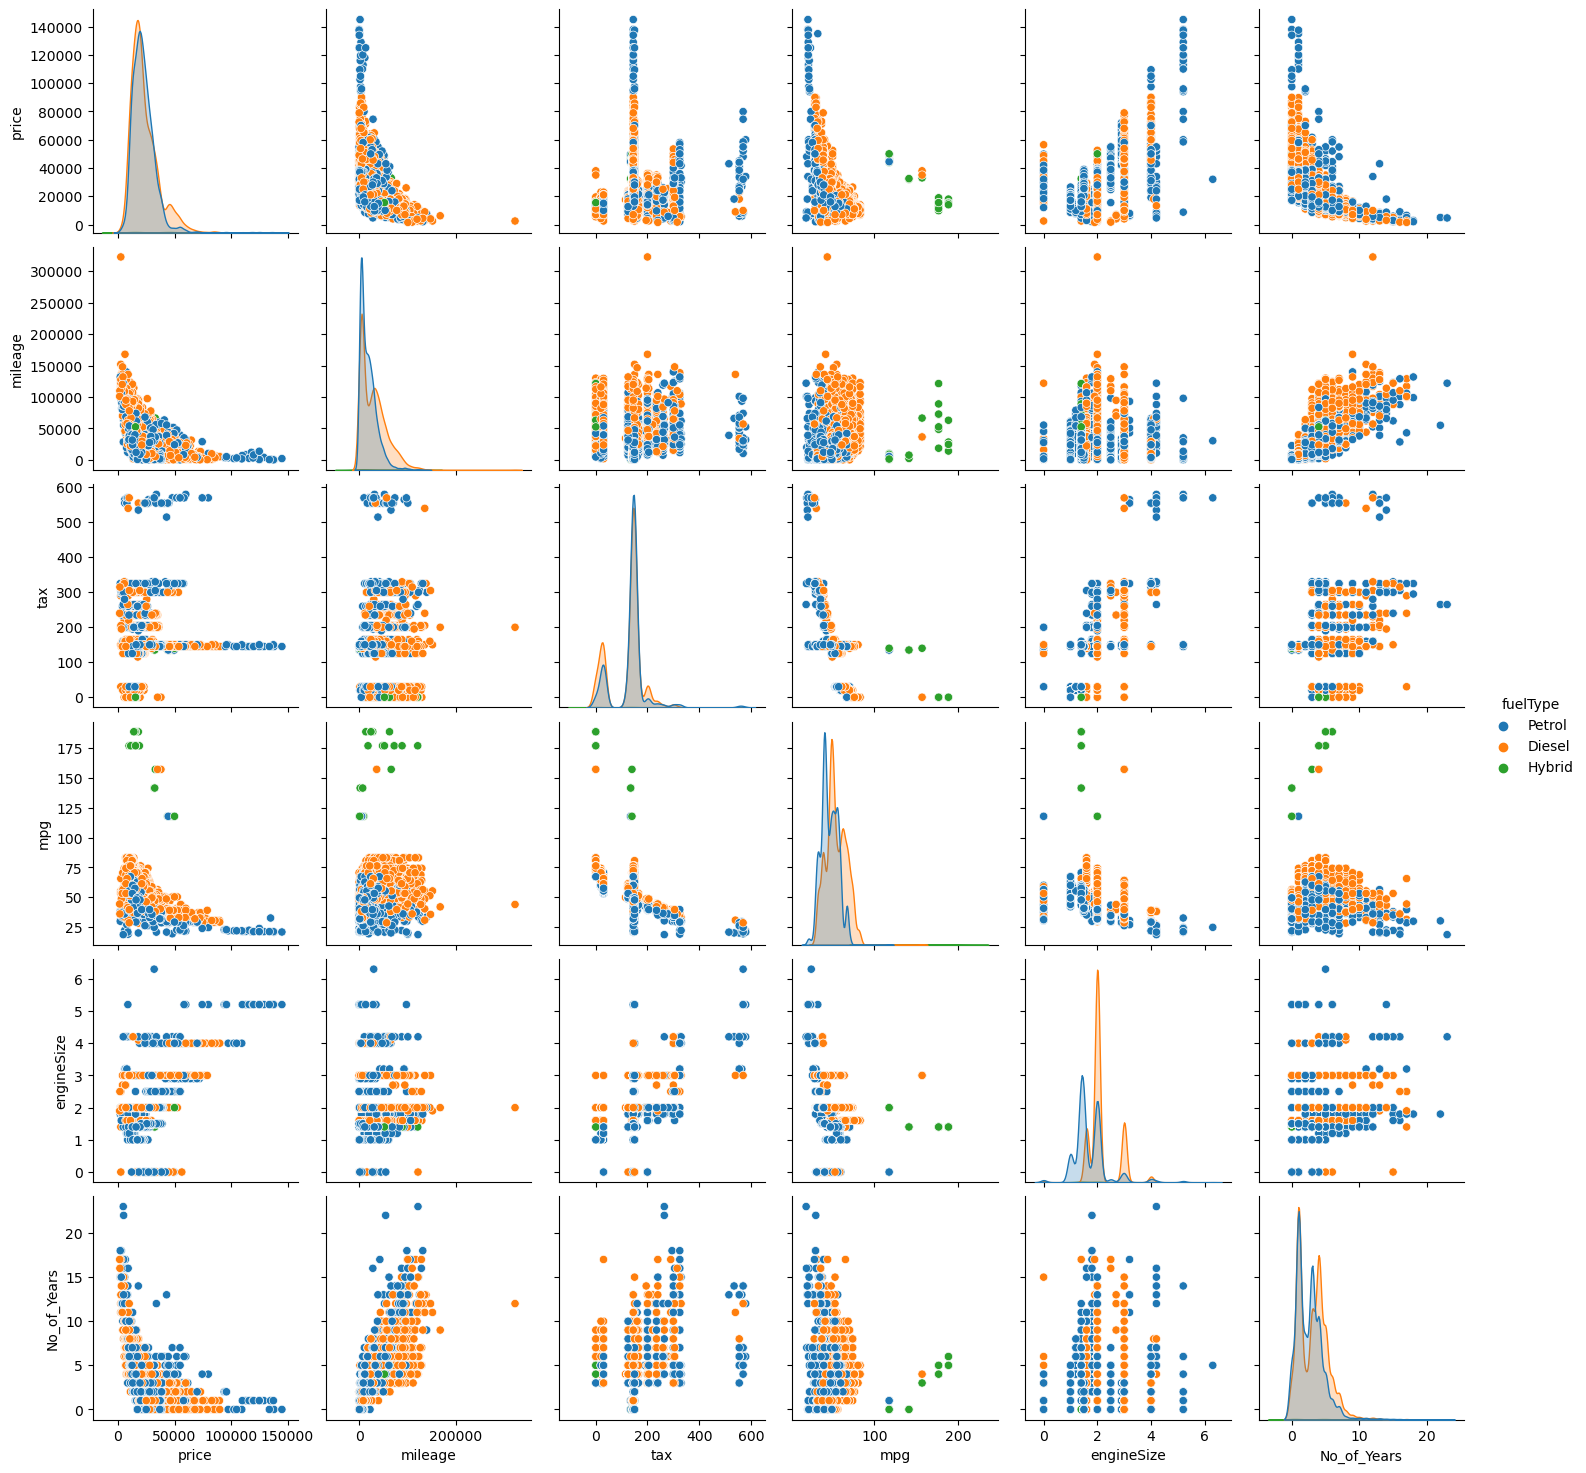

In [25]:
sns.pairplot(data= final_df, hue= 'fuelType', diag_kind= 'kde')

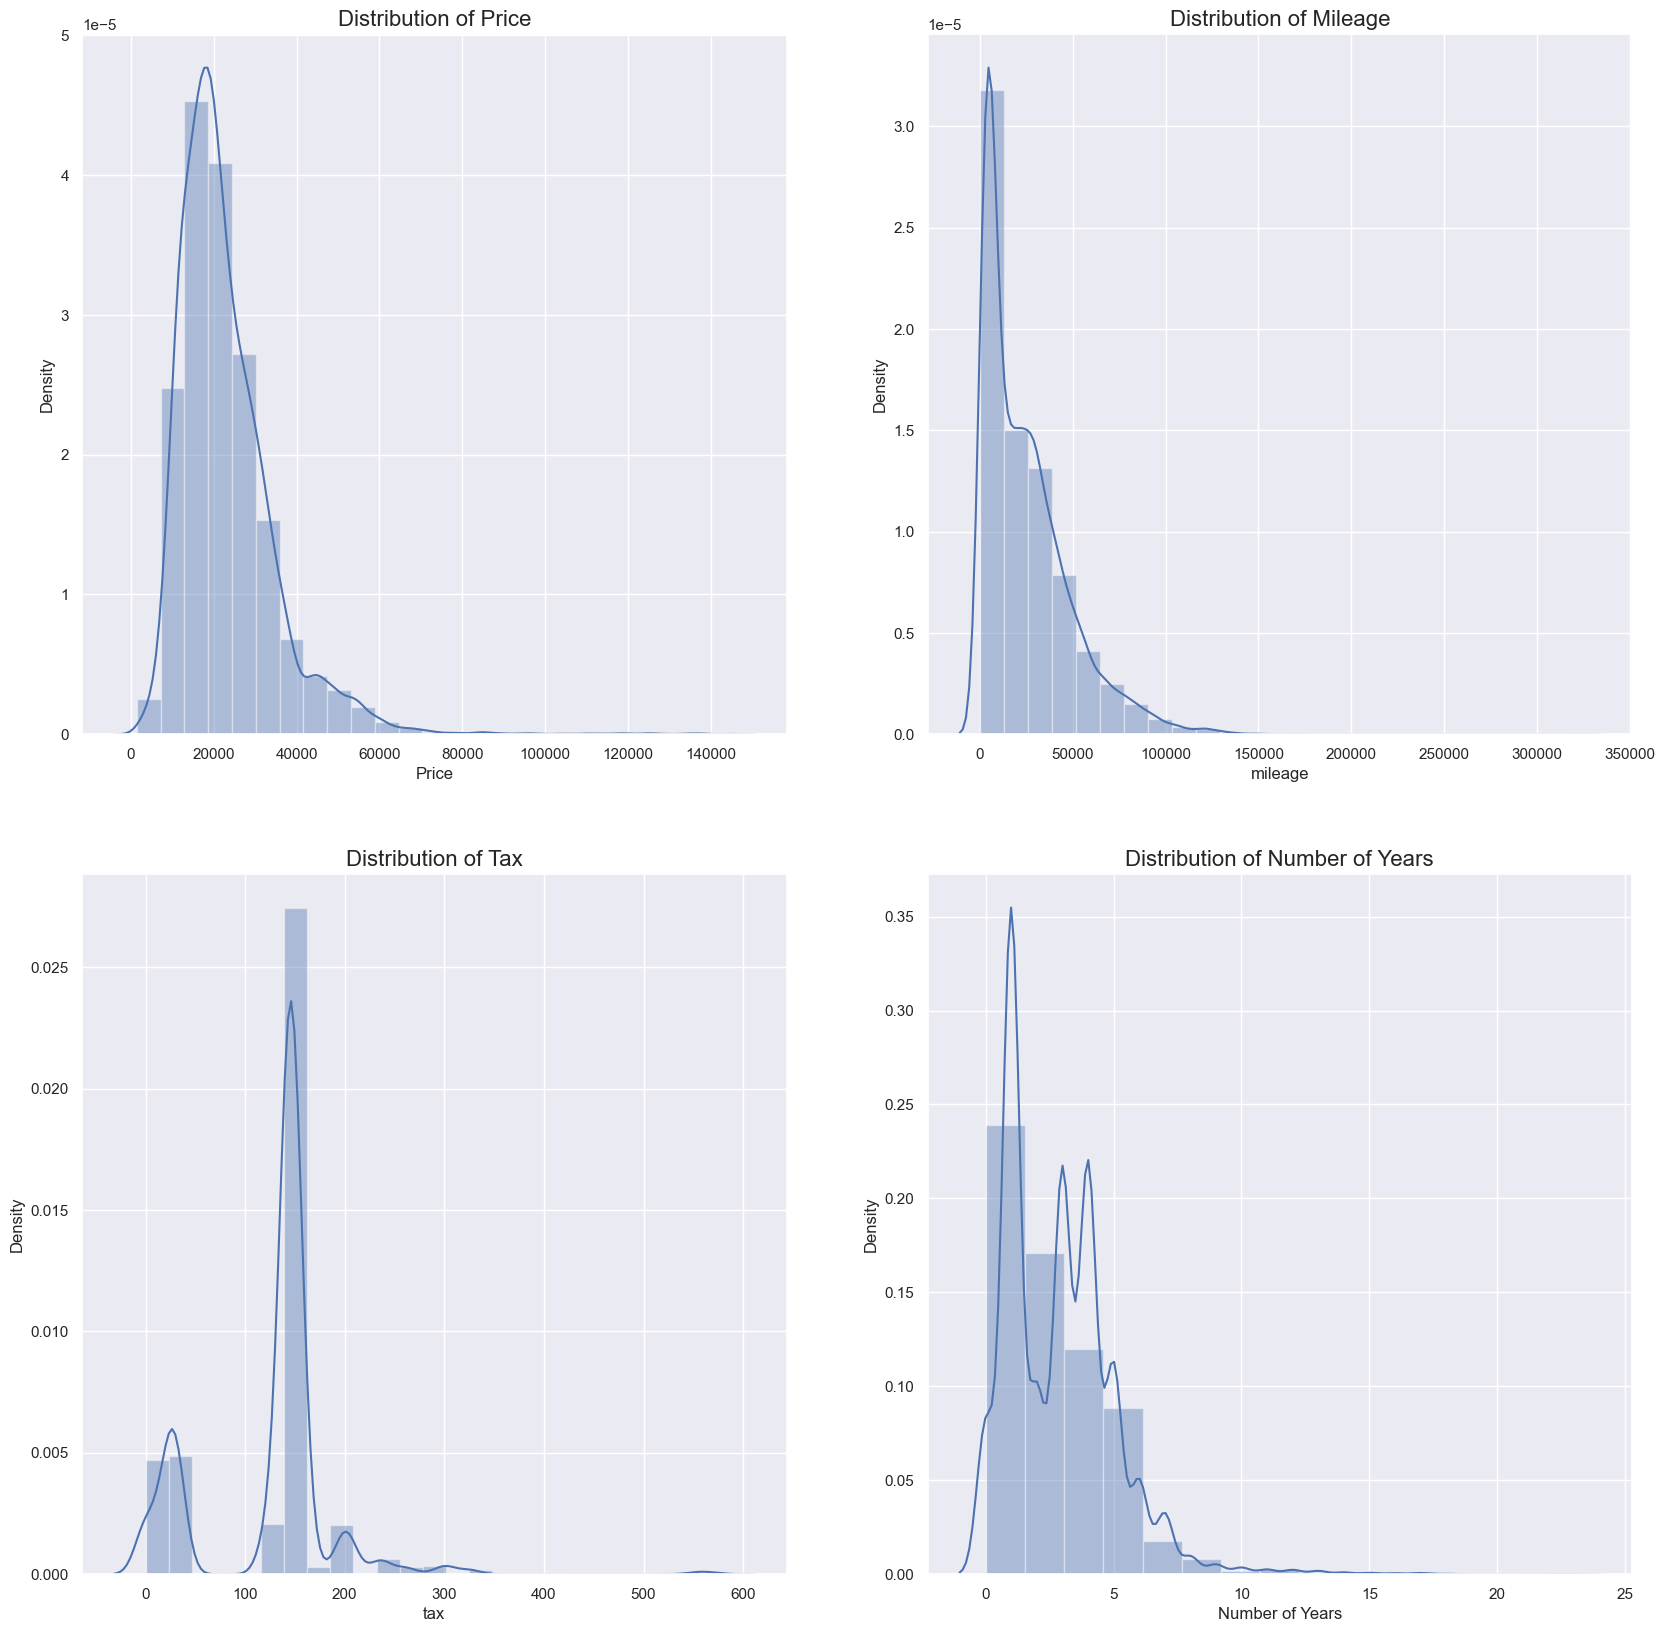

In [26]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

k1 = sns.distplot(a = final_df['price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Price', fontsize=16)
ax0.set(xlabel= 'Price', ylabel= 'Density')

k2 = sns.distplot(a = final_df['mileage'], bins= 25, ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Mileage', fontsize=16)
ax1.set(xlabel= 'mileage', ylabel= 'Density')

k1 = sns.distplot(a = final_df['tax'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Tax', fontsize=16)
ax2.set(xlabel= 'tax', ylabel= 'Density')

k1 = sns.distplot(a = final_df['No_of_Years'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Number of Years', fontsize=16)
ax3.set(xlabel= 'Number of Years', ylabel= 'Density')

plt.show()

In [27]:
print(final_df.columns[3:7])

Index(['fuelType', 'tax', 'mpg', 'engineSize'], dtype='object')


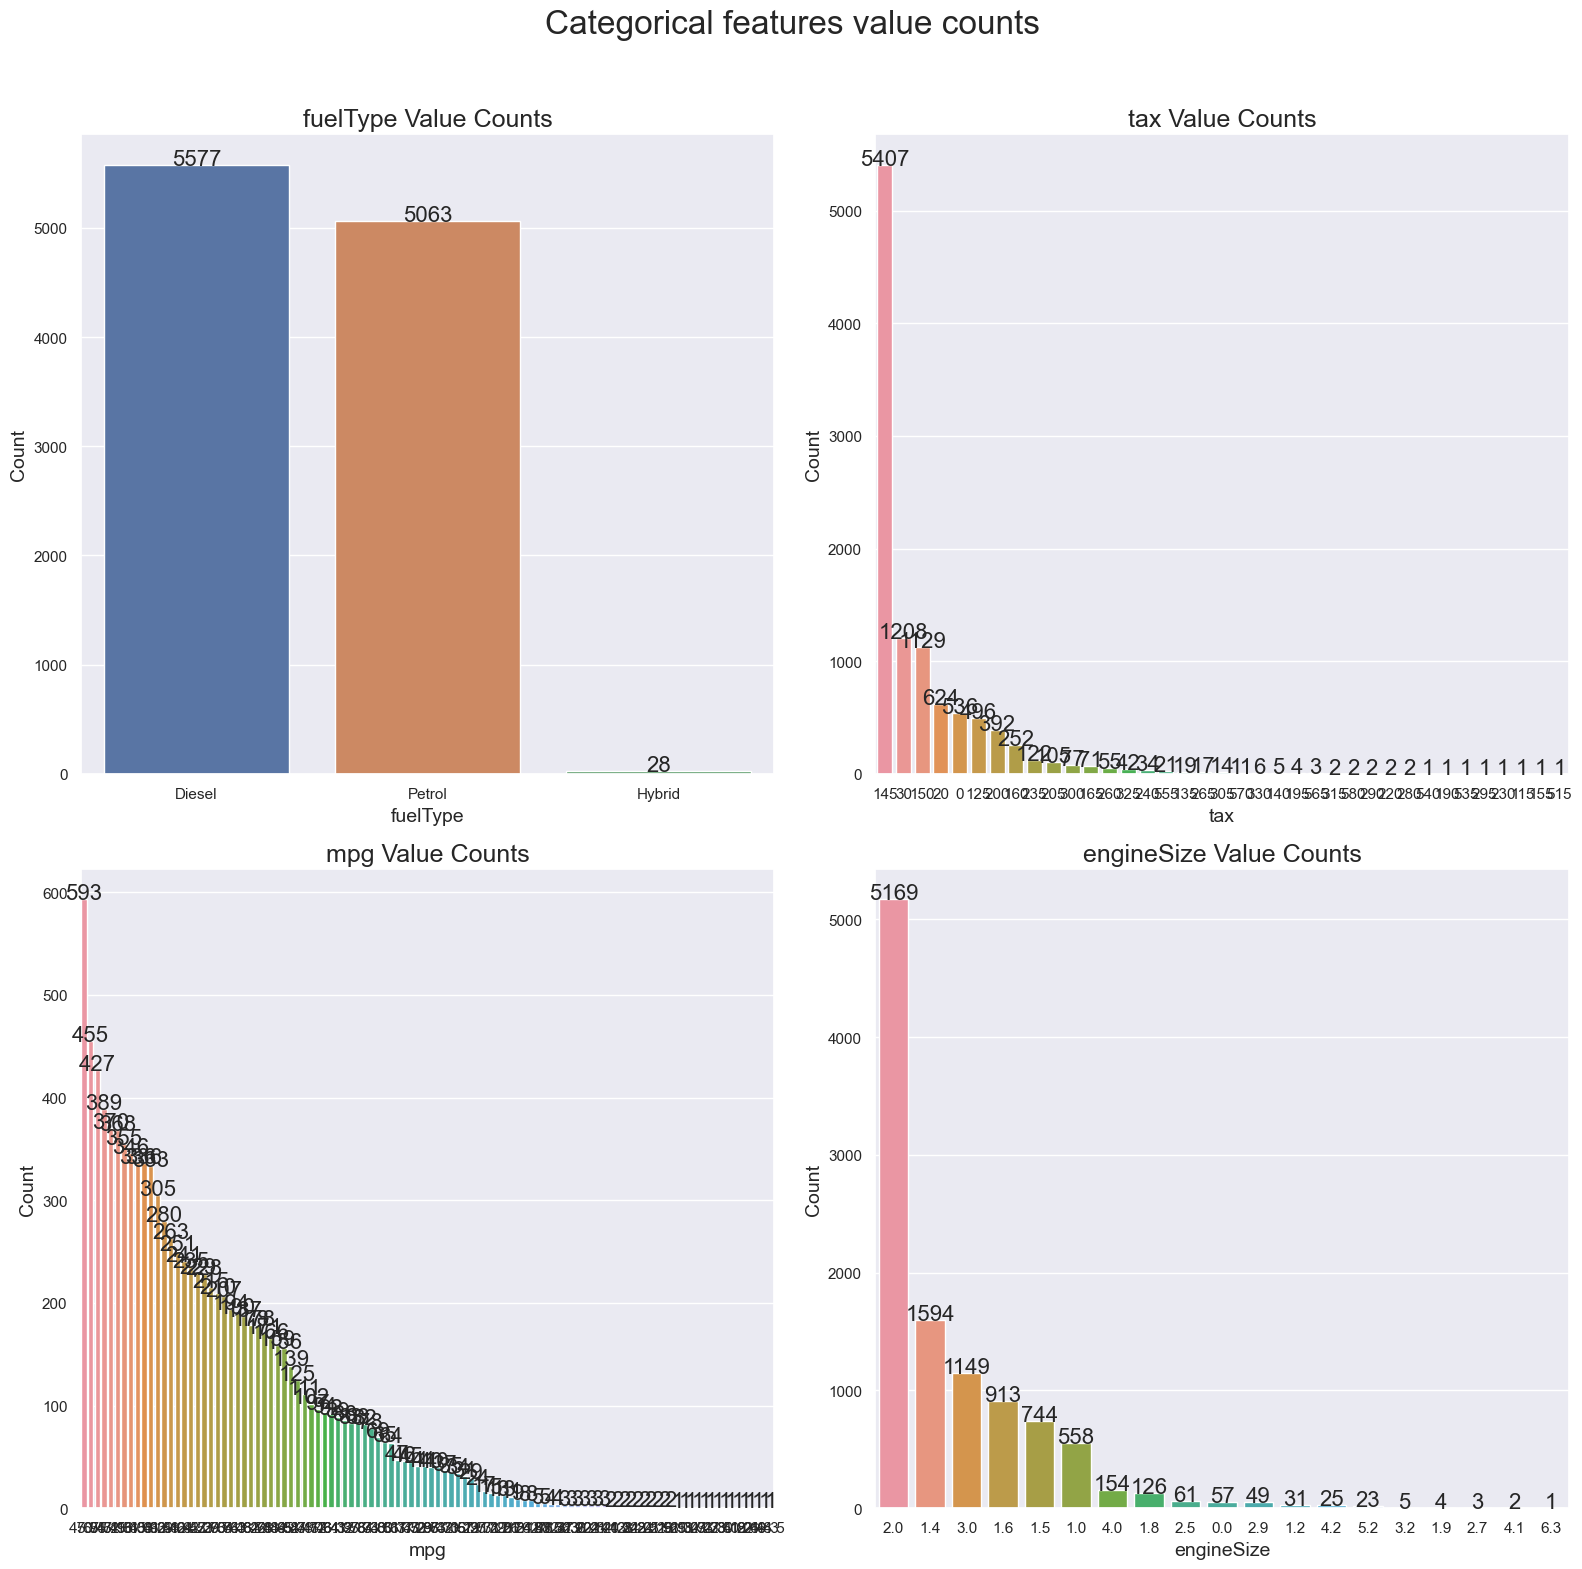

In [28]:
cat_col = list(final_df.columns[3:7]) 
fig = plt.figure(figsize=(16, 16))
plt.suptitle('Categorical features value counts', fontsize=24)
k = 0

for i in range(1, len(cat_col) + 1):
    ax = fig.add_subplot(2, 2, i)  
    cat_order = final_df[cat_col[k]].value_counts()

    sns.countplot(data=final_df, x=cat_col[k], order=cat_order.index, ax=ax)
    plt.xlabel(cat_col[k], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('{} Value Counts'.format(cat_col[k]), fontsize=18)
    
    for j in range(cat_order.shape[0]):
        count = cat_order.iloc[j]  
        strt = '{}'.format(count)
        plt.text(j, count + 0.1, strt, ha='center', fontsize=16)
    
    k += 1

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

Text(0.5, 1.0, 'Number of Years Value Counts')

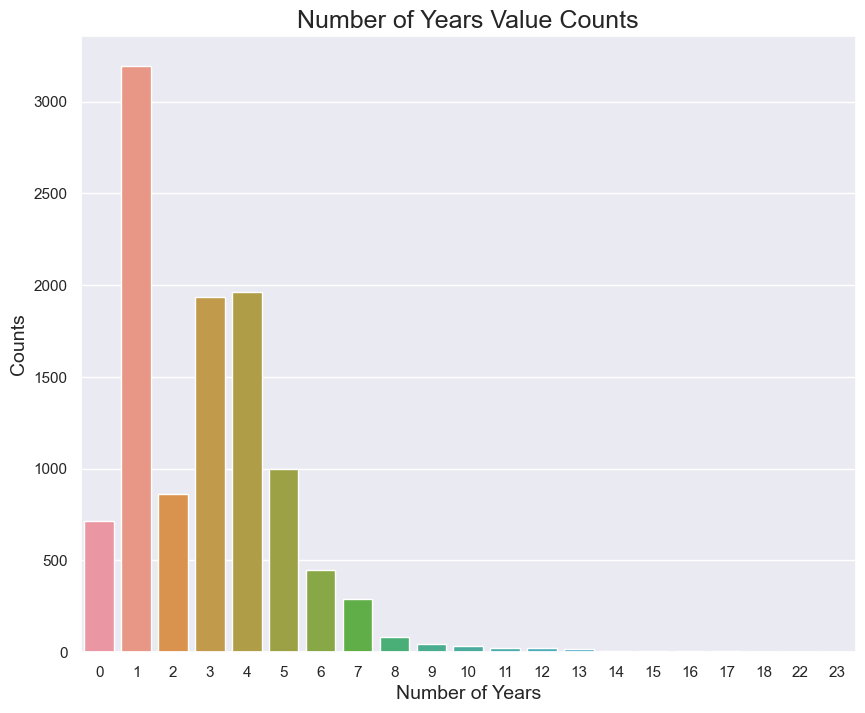

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(data= final_df, x= 'No_of_Years')
plt.xlabel('Number of Years', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number of Years Value Counts', fontsize=18)

In [30]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

price  mileage  tax   mpg  engineSize  No_of_Years  transmission_Manual  \
0  12500    15735  150  55.4         1.4            3                 True   
1  16500    36203   20  64.2         2.0            4                False   
2  11000    29946   30  55.4         1.4            4                 True   
3  16800    25952  145  67.3         2.0            3                False   
4  17300     1998  145  49.6         1.0            1                 True   

   transmission_Semi-Auto  fuelType_Hybrid  fuelType_Petrol  
0                   False            False             True  
1                   False            False            False  
2                   False            False             True  
3                   False            False            False  
4                   False            False             True

<Axes: >

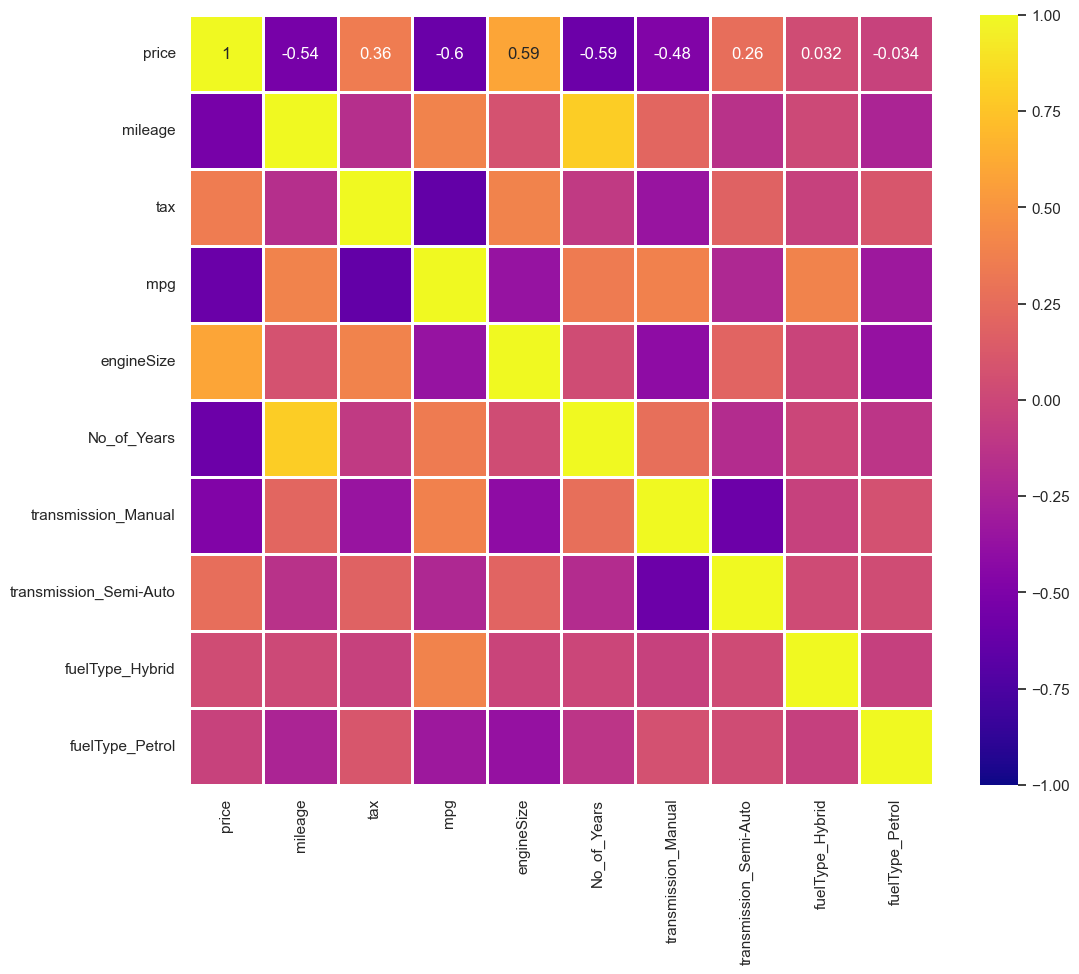

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(data = final_df.corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)

In [32]:
final_df.dtypes

price                       int64
mileage                     int64
tax                         int64
mpg                       float64
engineSize                float64
No_of_Years                 int64
transmission_Manual          bool
transmission_Semi-Auto       bool
fuelType_Hybrid              bool
fuelType_Petrol              bool
dtype: object

In [33]:
final_df['transmission_Semi-Auto'] = final_df['transmission_Semi-Auto'].astype('int64')
final_df['transmission_Manual'] = final_df['transmission_Manual'].astype('int64')
final_df['fuelType_Hybrid'] = final_df['fuelType_Hybrid'].astype('int64')
final_df['fuelType_Petrol'] = final_df['fuelType_Petrol'].astype('int64')

In [34]:
X = final_df.iloc[:, 1:]            # Feature matrix (independent variables)
y = final_df.iloc[:, 0]             # Target variable ( dependent variable)

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [36]:
print(model.feature_importances_)

[0.12258351 0.0560355  0.17112453 0.28468327 0.1680753  0.16947468
 0.0035103  0.00131239 0.02320053]


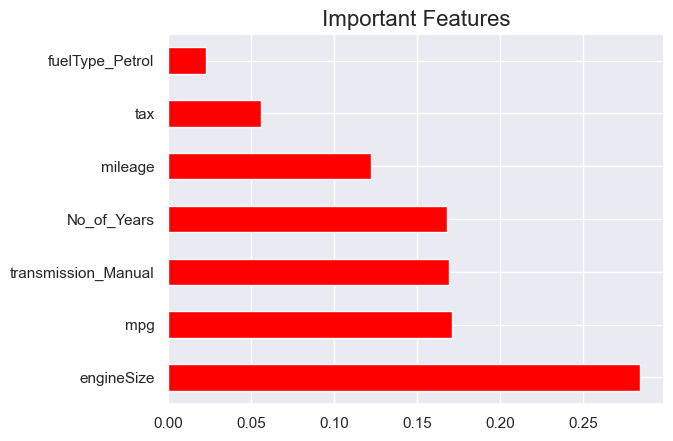

In [37]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

### Display – Accuracy and Mean Absolute Error 

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error  
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.9536613479643932
Mean Absolute Error 1538.0120162620183


In [22]:
f_pred = regression.predict(X)  #Prediction with Complete Data 
display (f_pred)

array([12864.85, 16457.12, 11755.03, ..., 17642.77, 20217.97, 18355.56])

##### Display actual and Predicted Values  

In [23]:
display(pd.concat ([df,pd.DataFrame(f_pred.reshape(len(f_pred),1),columns =['Price Prediction'])],axis =1))

model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Price Prediction  
0             1.4          12864.85  
1             2.0          16457.12  
2             1.4          11755.03  
3             2.0          17664.67  
4             1.0          17191.84  
...           ...               ...  
10663         1.0          17052.35  
10664         1.0          16985.51  
10665         1.0          17642.77  
10666         1.4          20217.97  
10667         1.4          18355.56  

[10668 rows x 10 columns]

#### Display – Accuracy and Mean Absolute Error 

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y, f_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y,f_pred))

R2 Score  0.9855226278983056
Mean Absolute Error 783.8568490834307


#### Create a Linear Regression Model 

In [25]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_train,Y_train)
print(reg)

LinearRegression()


In [26]:
y_pred = reg.predict(X_test) #Prediction with Test Data 
display (y_pred)

array([[13052.36575395],
       [29340.03009442],
       [31908.12716369],
       ...,
       [42649.94612604],
       [31554.51438191],
       [ 7285.29079975]])

#### Display actual and Predicted Values (Test Data) 

In [27]:
print (pd.concat ([pd.DataFrame(Y_test.reshape(len(Y_test),1),columns =['Car Price']), 
                   pd.DataFrame(y_pred.reshape(len(y_pred),1),columns =['Price Prediction'])],axis =1))

      Car Price  Price Prediction
0         14998      13052.365754
1         21950      29340.030094
2         28990      31908.127164
3         25489      26834.582322
4         30950      31477.717507
...         ...               ...
2129      23700      41546.889475
2130      18000      20705.470993
2131      45995      42649.946126
2132      30500      31554.514382
2133       8400       7285.290800

[2134 rows x 2 columns]


#### Display – Accuracy and Mean Absolute Error 

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_pred))

R2 Score  0.7916214142758062
Mean Absolute Error 3381.673339589113


In [29]:
f_pred = reg.predict(X)  #Prediction for complete data set 
display (f_pred)

array([[14619.72352246],
       [20635.8666066 ],
       [13800.63070127],
       ...,
       [19396.77261227],
       [20998.77567375],
       [16680.79154354]])

#### Display the Actual and predicted data  

In [30]:
result = pd.concat([df,pd.DataFrame(f_pred,columns = ['Price Prediction'])],axis=1)
display( result)

model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Price Prediction  
0             1.4      14619.723522  
1             2.0      20635.866607  
2             1.4      13800.630701  
3             2.0      19914.076834  
4             1.0      17339.679474  
...           ...               ...  
10663         1.0      19179.618582  
10664         1.0      19266.676532  
10665         1.0      19396.772612  
10666         1.4      20998.775674  
10667         1.4      16680.791544  

[10668 rows x 10 columns]

#### Display – Accuracy and Mean Absolute Error 

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y, f_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y,f_pred))

R2 Score  0.7907188149740689
Mean Absolute Error 3344.046507014818


#### Create Model Extra Tree Regressor 

In [32]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,Y_train)
y_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y_test, y_predict))
print  ('Mean Absolute Error', mean_absolute_error(Y_test,y_predict))

R2 Score  0.9579905854743775
Mean Absolute Error 1535.5323025356658


In [33]:
f_pred = ET_Model.predict(X)  #Display the Result Complete Data 
display (f_pred)
result = pd.concat([df,pd.DataFrame(f_pred,columns = ['Price Prediction'])],axis=1)
display( result)

array([12500. , 16500. , 11000. , ..., 17199. , 19499. , 17971.3])

model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Price Prediction  
0             1.4           12500.0  
1             2.0           16500.0  
2             1.4           11000.0  
3             2.0           16800.0  
4             1.0           17300.0  
...           ...               ...  
10663         1.0           16999.0  
10664         1.0           16999.0  
10665         1.0           17199.0  
10666         1.4           19499.0  
10667         1.4           17971.3  

[10668 rows x 10 columns]

#### Display – Accuracy and Mean Absolute Error 

In [34]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y, f_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y,f_pred))

R2 Score  0.9906824521873272
Mean Absolute Error 349.94580680019163


#### Install Cat Boost

In [35]:
!pip install catboost

#### Model CatBoostRegressor

In [36]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
print (cat.fit(X_train,Y_train))

Learning rate set to 0.057452
0:	learn: 11184.0694779	total: 150ms	remaining: 2m 29s
1:	learn: 10690.2138498	total: 153ms	remaining: 1m 16s
2:	learn: 10221.1011877	total: 157ms	remaining: 52.1s
3:	learn: 9778.8067263	total: 160ms	remaining: 39.9s
4:	learn: 9382.6454054	total: 163ms	remaining: 32.5s
5:	learn: 8989.9290587	total: 166ms	remaining: 27.6s
6:	learn: 8628.4892653	total: 169ms	remaining: 24s
7:	learn: 8280.9179062	total: 172ms	remaining: 21.3s
8:	learn: 7950.5476053	total: 174ms	remaining: 19.2s
9:	learn: 7636.7735365	total: 177ms	remaining: 17.6s
10:	learn: 7349.6084699	total: 180ms	remaining: 16.2s
11:	learn: 7084.0457263	total: 183ms	remaining: 15.1s
12:	learn: 6842.7060927	total: 186ms	remaining: 14.1s
13:	learn: 6608.0244743	total: 191ms	remaining: 13.4s
14:	learn: 6387.7285726	total: 194ms	remaining: 12.7s
15:	learn: 6170.1354894	total: 197ms	remaining: 12.1s
16:	learn: 5973.9133066	total: 200ms	remaining: 11.5s
17:	learn: 5780.4713044	total: 203ms	remaining: 11.1s
18:	l

In [37]:
cat_pred=cat.predict(X_test) #Cat Boost Prediction test Data 
display (cat_pred)

array([13386.63817795, 24056.86842882, 28082.99514751, ...,
       45959.31234642, 31714.44751009,  9481.45994163])

In [38]:
print  ('Mean Absolute Error', mean_absolute_error(Y_test,cat_pred))   #Cat Boost Accuracy
print  ('R2 Score ', r2_score(Y_test,cat_pred))

Mean Absolute Error 1453.5230700749125
R2 Score  0.9641612028134969


In [39]:
catf_pred = cat.predict(X)  #Prediction Complete Data 
display (catf_pred )

array([13989.8267214 , 16578.03846793, 12489.54800057, ...,
       18716.55396652, 20908.57305802, 17896.99245815])

#### Display the result

In [40]:
result = pd.concat([df,pd.DataFrame(catf_pred ,columns = ['Price Prediction'])],axis=1)
display( result)

model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Price Prediction  
0             1.4      13989.826721  
1             2.0      16578.038468  
2             1.4      12489.548001  
3             2.0      18793.884463  
4             1.0      18493.205301  
...           ...               ...  
10663         1.0      19428.713314  
10664         1.0      18877.541748  
10665         1.0      18716.553967  
10666         1.4      20908.573058  
10667         1.4      17896.992458  

[10668 rows x 10 columns]

#### Display the Accuracy and Error 

In [41]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y, catf_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y,catf_pred))

R2 Score  0.9745608180217411
Mean Absolute Error 1300.981301437808


### RandomizedSearchCV
#### Hyperparameter Tuning and RandomizedSearchCV - Model used – RandomForestRegressor

In [42]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=42, n_jobs = -1)


### Fit Model

In [43]:
display (rCV.fit(X_train,Y_train))

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [44]:
rf_pred=rCV.predict(X_test)  # Prediction
display (rf_pred)

array([14089.00364715, 23737.89640676, 28513.40443141, ...,
       48195.62030934, 31290.98238986, 10027.79714686])

#### Mean_absolute_error and mean_squared_error

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(Y_test,rf_pred))
print('MSE',mean_squared_error(Y_test,rf_pred))

MAE 1503.3441233095464
MSE 5682145.442649084


#### Display Accuracy

In [46]:
display (r2_score(Y_test,rf_pred))

0.9586500484830008

#### Display the Result Complete the Data

In [47]:
 full_rf_pred=rCV.predict(X)
display (full_rf_pred)

array([13269.28952268, 16547.59512651, 11991.86070826, ...,
       17993.55257145, 20475.84142487, 18481.45947547])

#### Display Error and accuracy 

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(Y,full_rf_pred))
print('MSE',mean_squared_error(Y,full_rf_pred))
display (r2_score(Y,full_rf_pred))

MAE 1136.7766804398982
MSE 3169566.9786900613


0.9769023507169855

### Create Pickle File 
#### Use pickle to save our model so that we can use it later


In [49]:
import pickle 
# Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))


#### Load Pickle File and  do Prediction  

In [50]:
model=pickle.load(open('model.pkl','rb'))
p_pred = model.predict (X)
print (p_pred)

[13989.8267214  16578.03846793 12489.54800057 ... 18716.55396652
 20908.57305802 17896.99245815]


#### Display the result   

In [51]:
result = pd.concat([df,pd.DataFrame(p_pred ,columns = ['Price Prediction'])],axis=1)
display( result)

model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Price Prediction  
0             1.4      13989.826721  
1             2.0      16578.038468  
2             1.4      12489.548001  
3             2.0      18793.884463  
4             1.0      18493.205301  
...           ...               ...  
10663         1.0      19428.713314  
10664         1.0      18877.541748  
10665         1.0      18716.553967  
10666         1.4      20908.573058  
10667         1.4      17896.992458  

[10668 rows x 10 columns]

#### Display the Accuracy and Error   

In [52]:
from sklearn.metrics import r2_score,mean_absolute_error
print  ('R2 Score ', r2_score(Y, p_pred))
print  ('Mean Absolute Error', mean_absolute_error(Y,p_pred))

R2 Score  0.9745608180217411
Mean Absolute Error 1300.981301437808
